In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
test = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv")
train = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")
print(train.shape)
train.head(10)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(103904, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [2]:
train = train.drop('Unnamed: 0', axis=1)
train.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [3]:
train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [4]:
print(test.shape)
test.head(10)

(25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [5]:
test = test.drop('Unnamed: 0', axis=1)
test.dtypes
test.shape

(25976, 24)

In [6]:
test.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [7]:
test.dropna(inplace=True)
test['Arrival Delay in Minutes']

0        44.0
1         0.0
2         0.0
3         6.0
4        20.0
         ... 
25971     0.0
25972     0.0
25973     0.0
25974     0.0
25975     0.0
Name: Arrival Delay in Minutes, Length: 25893, dtype: float64

In [8]:
test.isna().sum()



id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [9]:
train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [10]:
train.dropna(inplace=True)
train['Arrival Delay in Minutes']


0         18.0
1          6.0
2          0.0
3          9.0
4          0.0
          ... 
103899     0.0
103900     0.0
103901    14.0
103902     0.0
103903     0.0
Name: Arrival Delay in Minutes, Length: 103594, dtype: float64

In [11]:
train.columns = [c.replace('_', ' ') for c in train.columns]
test.columns = [c.replace('_', ' ') for c in test.columns]


In [12]:
train.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

<AxesSubplot: xlabel='Customer Type', ylabel='count'>

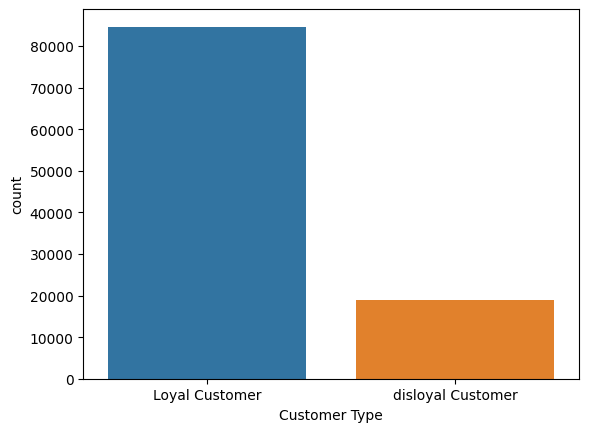

In [13]:
sns.countplot(data=train,x=train['Customer Type'])

<AxesSubplot: xlabel='Food and drink', ylabel='Age'>

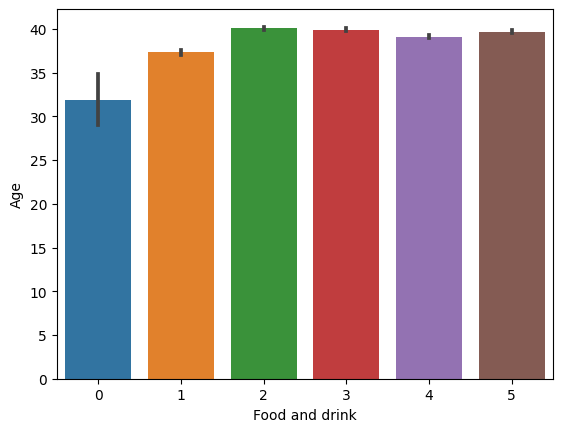

In [15]:
sns.barplot(data=train,x='Food and drink',y='Age',orient='v')



In [16]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

<AxesSubplot: xlabel='Class', ylabel='Flight Distance'>

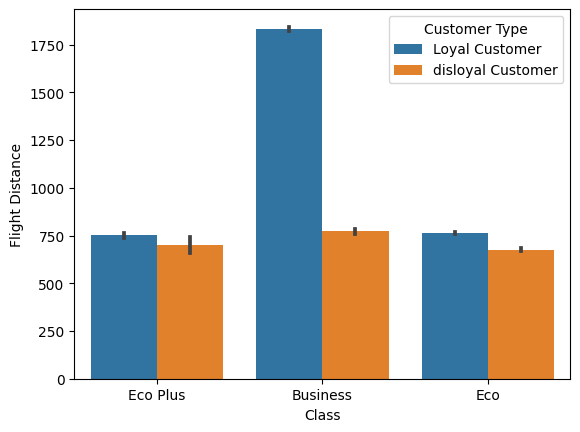

In [17]:
sns.barplot(data=train,x='Class',y='Flight Distance',orient='v',hue='Customer Type')


<AxesSubplot: xlabel='satisfaction', ylabel='count'>

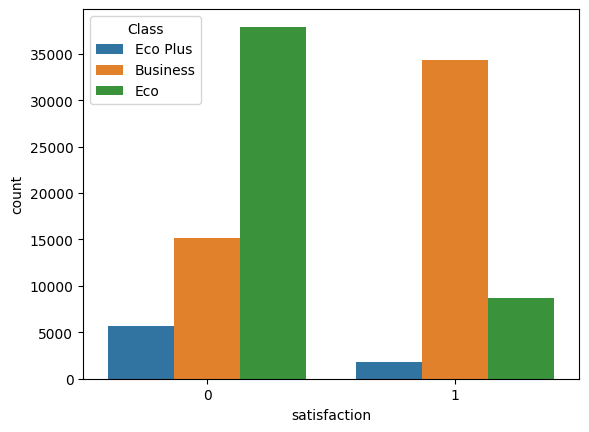

In [18]:
sns.countplot(x=train['satisfaction'],hue=train['Class'],data=train)

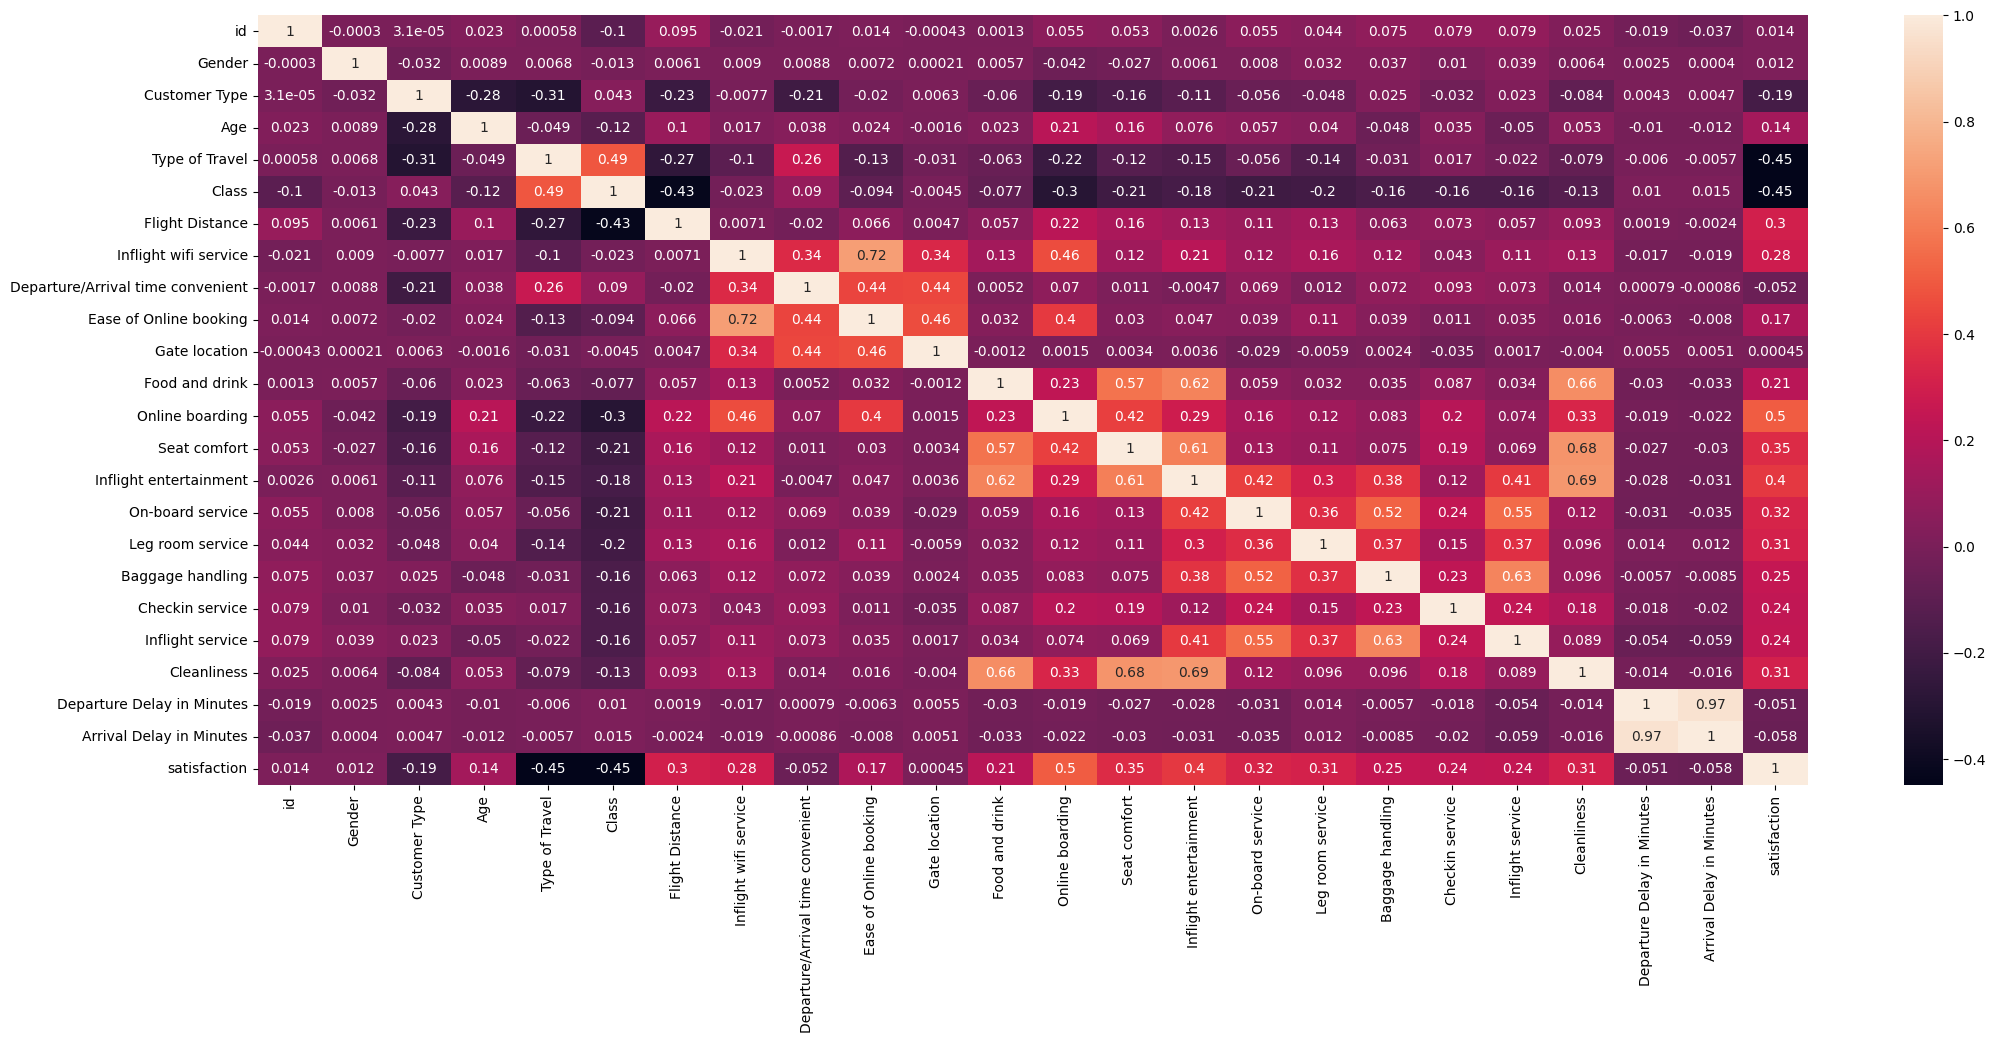

In [19]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

for col in train.columns:
    if train[col].dtypes=='O':
        train[col]=le.fit_transform(train[col])

plt.figure(figsize=(25,10))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [20]:
X=train.iloc[:,:-1]
y=train['satisfaction']
cor_target = abs(train.corr()['satisfaction'])
relevant_features = cor_target[cor_target>0.05]
relevant_features.sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.503447
Class                                0.449466
Type of Travel                       0.448995
Inflight entertainment               0.398203
Seat comfort                         0.349112
On-board service                     0.322450
Leg room service                     0.313182
Cleanliness                          0.305050
Flight Distance                      0.298915
Inflight wifi service                0.284163
Baggage handling                     0.247819
Inflight service                     0.244852
Checkin service                      0.235914
Food and drink                       0.209659
Customer Type                        0.187558
Ease of Online booking               0.171507
Age                                  0.137040
Arrival Delay in Minutes             0.057582
Departure/Arrival time convenient    0.051718
Departure Delay in Minutes           0.050515
Name: satisfaction, dtype: float64

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=8)
X_important = selector.fit_transform(X, y)

mask = selector.get_support()

important_feature_names = X.columns[mask]

print(important_feature_names)

Index(['Type of Travel', 'Class', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Cleanliness'],
      dtype='object')


In [22]:
X_new=train[['Type of Travel','Class','Online boarding','On-board service','Leg room service','Cleanliness','Seat comfort','Inflight entertainment' ]]
X_new.shape
X_new.head(5)

,Type of Travel,Class,Online boarding,On-board service,Leg room service,Cleanliness,Seat comfort,Inflight entertainment
0,1,2,3,4,3,5,5,5
1,0,0,3,1,5,1,1,1
2,0,0,5,4,3,5,5,5
3,0,0,2,2,5,2,2,2
4,0,0,5,3,4,3,5,3


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y,train_size=0.70)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
from sklearn.naive_bayes import BernoulliNB

# Create a Gaussian naive Bayes object
nb_model = BernoulliNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred_nb = nb_model.predict(X_test)
print(accuracy_score(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))

0.7670130956594485
[[13614  4015]
 [ 3226 10224]]


In [27]:
import pandas as pd
import numpy as np

train = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")
test = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv")

train.dropna(inplace=True)
test.dropna(inplace=True)

train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace=True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace=True)

train['prediction'] = np.where(
    ((train['Type of Travel'] == 'Personal Travel') & (train['Online boarding'] >= 2) & (train['Cleanliness'] >= 3)) |
    ((train['Type of Travel'] == 'Business travel') & (train['Online boarding'] >= 3) & (train['Cleanliness'] >= 2)),
    1,
    0
)

test['prediction'] = np.where(
    ((test['Type of Travel'] == 'Personal Travel') & (test['Online boarding'] >= 2) & (test['Cleanliness'] >= 3)) |
    ((test['Type of Travel'] == 'Business travel') & (test['Online boarding'] >= 3) & (test['Cleanliness'] >= 2)),
    1,
    0
)

train_accuracy = (train['prediction'] == train['satisfaction']).mean()
test_accuracy = (test['prediction'] == test['satisfaction']).mean()

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.645857868216306
Test Accuracy: 0.6533426022477118


In [31]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred_nb))
cm= confusion_matrix(y_test,y_pred_nb)
print("Confusion Matrix:",
      cm)
pr=precision_score(y_test,y_pred_nb)
recall=recall_score(y_test,y_pred_nb)
f1=f1_score(y_test,y_pred_nb)
print("precision ",pr)
print("recall ",recall)
print("f1 score",f1)

Accuracy: 0.7670130956594485
Confusion Matrix: [[13614  4015]
 [ 3226 10224]]
precision  0.7180279514010816
recall  0.7601486988847583
f1 score 0.7384882083137708
